<a href="https://colab.research.google.com/github/Chetan1207/OIBSIP/blob/main/Car_Price_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Car Price Prediction

---



**Project Type -** Regression

**Contribution -** Individual

**Name-** Chetan Prakash

## Project Summary

---

Car price prediction is a machine learning project that involves predicting the price of cars based on several features such as company name, doornumber, mileage, engine specifications, and other factors. The objective of this project is to build a predictive model that can accurately estimate the price of a car based on the given input features.

The project involved several stages, starting with data collection and cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. The data was collected from various sources and involved a total of 205 observations with 26 variables. The data was then cleaned by removing missing values, duplicates, and outliers.

Exploratory data analysis was performed to understand the distribution of the variables, the relationship between different variables, and identify any patterns or trends. Feature engineering was then performed to transform the data into a suitable format for modeling. This involved handling categorical variables, scaling numerical variables, and removing highly correlated variables.

Several machine learning models were then trained on the preprocessed data to predict the car prices. The models evaluated included linear regression, Lasso regression, ElasticNet regression, decision tree regression, random forest regression, and XGBoost regression. The performance of each model was evaluated using the R-squared value and mean squared error.

# GitHub Link

---

https://github.com/Chetan1207/OIBSIP

## Problem Statement

---
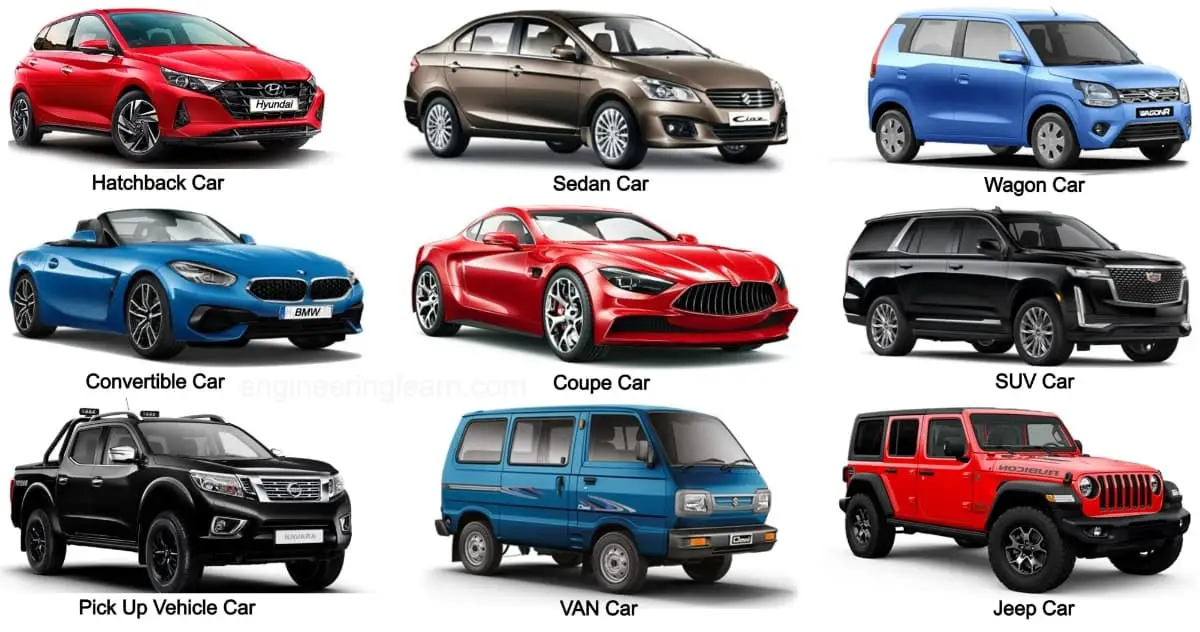
The problem statement for Car Price Prediction is to build a machine learning model that can accurately predict the selling price of used cars based on various features such as car make, model, year of manufacture, engine capacacity, mileage, and other factors. The goal is to help used car dealers and buyers make informed decisions about pricing and purchasing used cars. The model should be able to predict the selling price of a car with high accuracy and minimal error. This project can help improve the efficiency of the used car market and benefit both buyers and sellers.


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from numpy import math
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from scipy import stats
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/car price.xlsx'
df=pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Know Your Data

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape # shape of the dataset

(205, 26)

In [ ]:
df.columns # Columns name present in dataset

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info() # Check information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 16 Numerical columns and 10 Categorical columns.

In [ ]:
df.describe(include='all') # Descriptive data for all the columns

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [ ]:
df.isnull().sum() # checking the null values present in dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.nunique() # Check unique value present in dataset

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
len(df[df.duplicated()]) # check duplicate values

0

In [ ]:
df1=df.copy() # copy of original dataset so that original dataset does not affected

In [ ]:
# Splitting company name from CarName column
CompanyName = df1['CarName'].apply(lambda x : x.split(' ')[0])
df1.insert(3,"company_name",CompanyName)
df1.drop(['CarName'],axis=1,inplace=True)
df1.head()


,car_ID,symboling,company_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df1.company_name.unique() # checking the unique company name present in variable

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Replace all the incorrect spell present in dataset
df1['company_name'].replace('nissan', 'Nissan', inplace=True)
df1['company_name'].replace('maxda', 'mazda', inplace=True)
df1['company_name'].replace('porcshce', 'porsche', inplace=True)
df1['company_name'].replace('toyouta', 'toyota', inplace=True)
df1['company_name'].replace('vw', 'volkswagen', inplace=True)
df1['company_name'].replace('vokswagen', 'volkswagen', inplace=True)
df1.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Drop some feature who doesn't require
df1.drop('car_ID', axis=1, inplace=True)
df1.drop('symboling', axis=1, inplace=True)
df1.drop('enginelocation', axis=1, inplace=True)

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

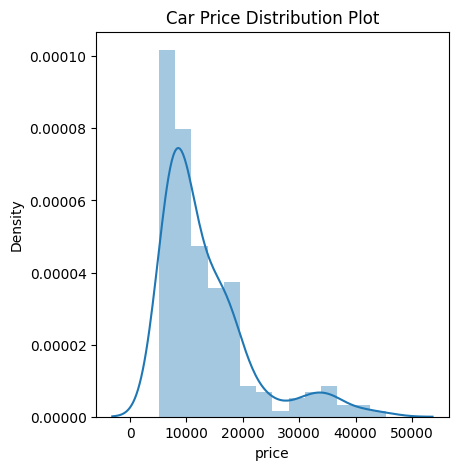

In [ ]:
# Plotting distribution plot for checking the values distribution in target variable
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df1.price)

Highly positive skwed data present in dataset so we have to distribute it normally for the accuracy of the model

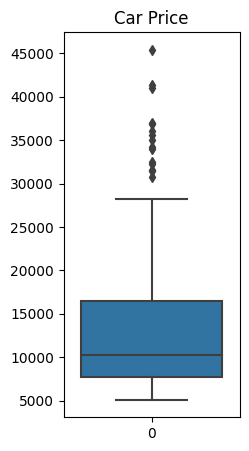

In [ ]:
# Checking for outlier present in dataset with the help of boxplot
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.boxplot(df1['price'])
plt.title('Car Price')
plt.show()

So we have outlier present in the data set so we have to remove them

In [ ]:
# Z score method to remove outliers present in dataset
df1=df1[(np.abs(stats.zscore(df1['price']))<1)] # take z-score value less then 1

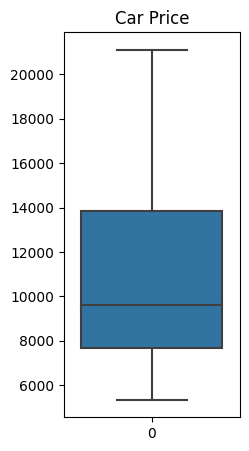

In [ ]:
# Again use boxplot to check outlier present in dependent variable
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.boxplot(df1['price'])
plt.title('Car Price')
plt.show()

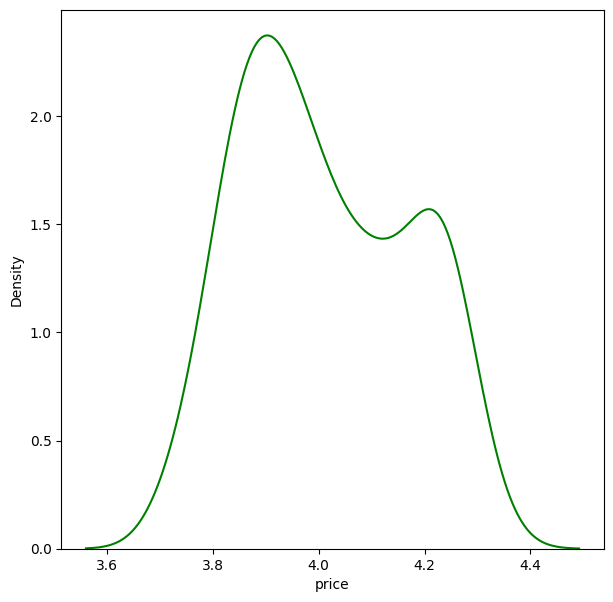

In [ ]:
# try to make normal distribution of the data with the square root method
price_log=np.log10(df1['price'])
plt.figure(figsize=(7,7))
sns.kdeplot(price_log, color='Green')
plt.show()

We try to use log10 method to distribut it normally and here we can see that mostly values are distributed normally.

In [ ]:
numerical_columns=df1.describe().columns # print the numerical columns name present in dataset
numerical_columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

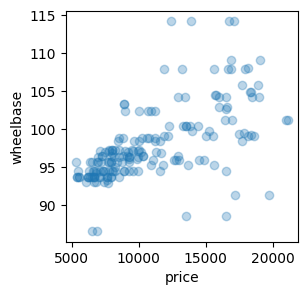

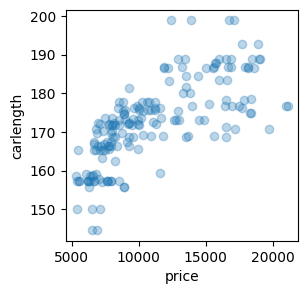

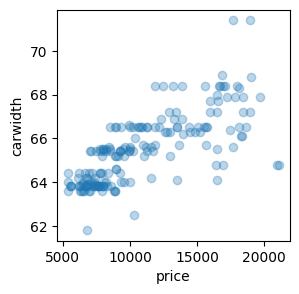

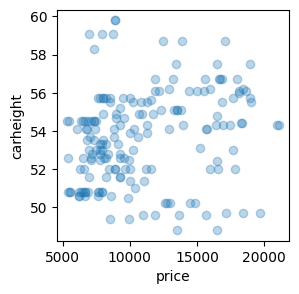

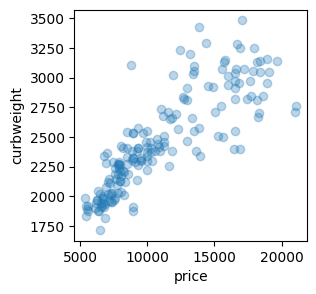

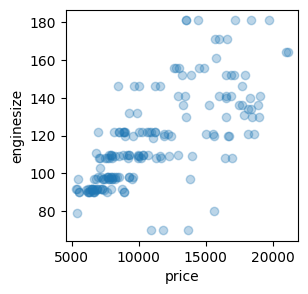

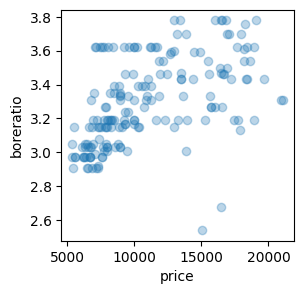

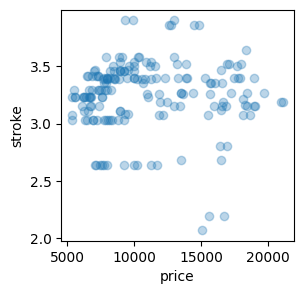

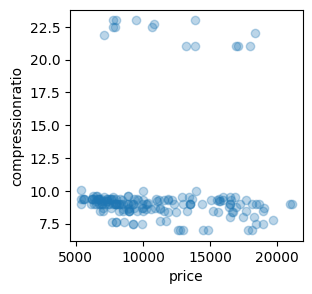

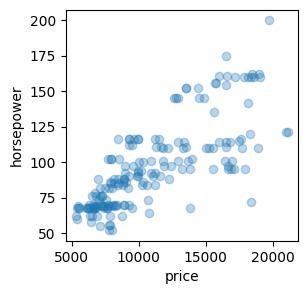

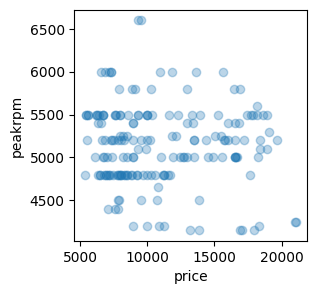

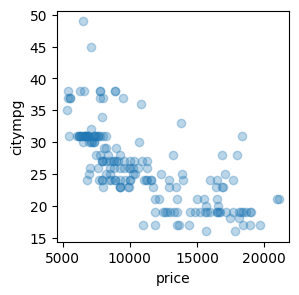

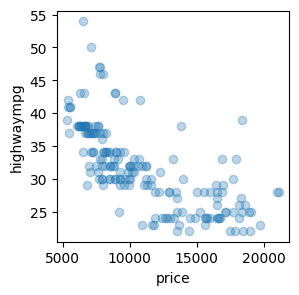

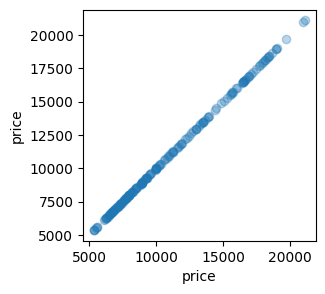

In [ ]:
# Function to show the realtion between all the independent variable to dependent variable
def relation(independent_variable, other_variables, dataframe):
    for col in other_variables:
        fig = plt.figure(figsize=(3, 3))
        plt.scatter(dataframe[independent_variable], dataframe[col], alpha=0.3)
        plt.xlabel(independent_variable)
        plt.ylabel(col)
        plt.show()
other_variables = numerical_columns[:].tolist() # Select all the columns
independent_variable = 'price'

relation(independent_variable, other_variables, df1)

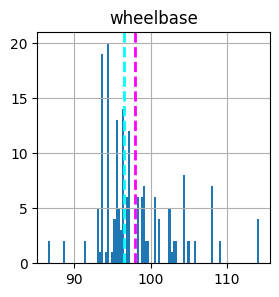

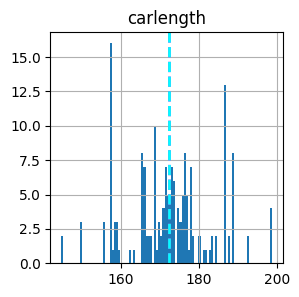

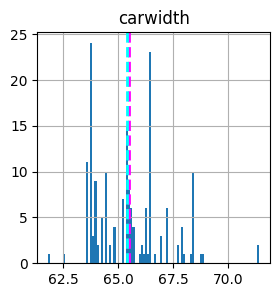

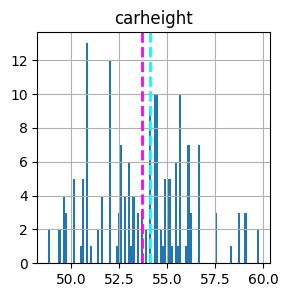

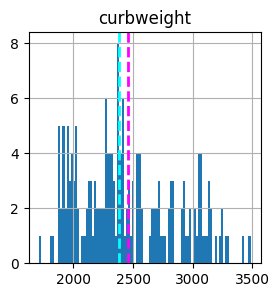

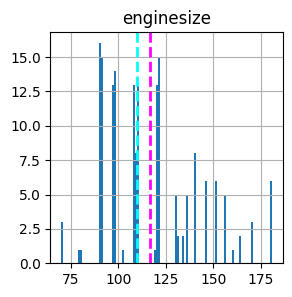

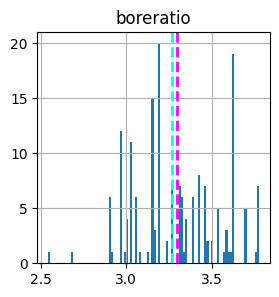

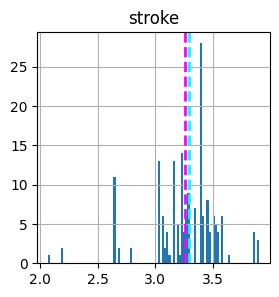

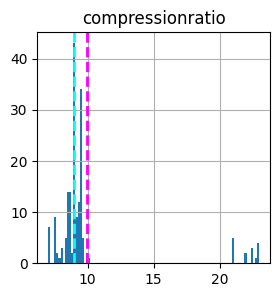

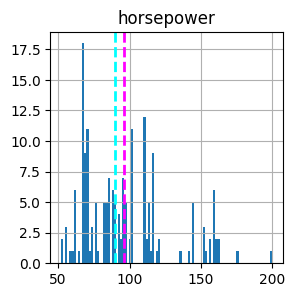

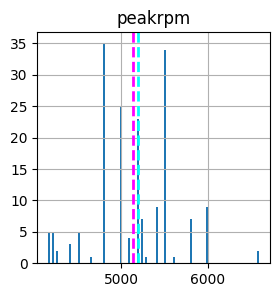

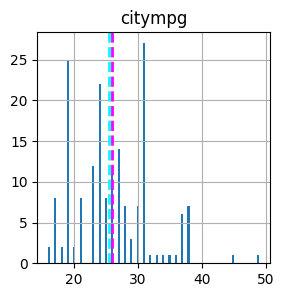

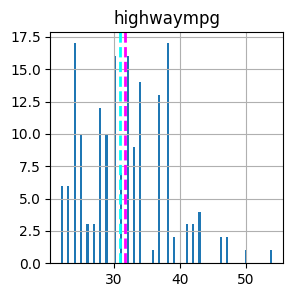

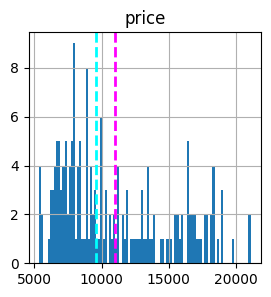

In [ ]:
for column in numerical_columns[:]: # this chart shows the mean and median of each numeric values
   fig = plt.figure(figsize=(3, 3))
   ax = fig.gca()
   feature = df1[column]
   feature.hist(bins=100, ax = ax)
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
   ax.set_title(column)
plt.show()

# Data Wrangling with the help of Visulization charts

<Axes: >

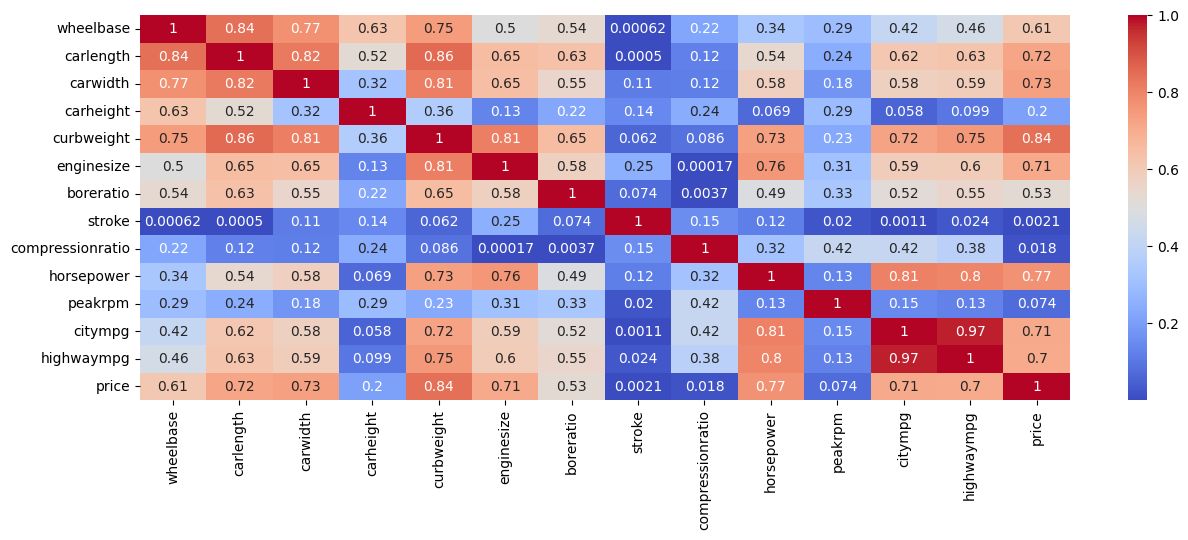

In [ ]:
# Correlation between all the numerical data with the help of heat map
plt.figure(figsize=(15,5))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True,cmap="coolwarm")

There are so many dependent variable show dependency to another variable so we try to deal with it.

## Feature Engineering

In [ ]:
# feature engineering
df1['car_area']= (df1['carlength']*df1['carwidth'])
df1.drop('carlength', axis=1, inplace=True)
df1.drop('carwidth', axis=1, inplace=True)
df1['weight_to_area'] = df1['curbweight'] / (df1['car_area']*df1['carheight'])
df1.drop('curbweight', axis=1, inplace=True)
df1['area_to_wheel_base'] = (df1['car_area']*df1['carheight']) / df1['wheelbase']
df1.drop('wheelbase', axis=1, inplace=True)
df1['avg_mpg'] = (df1['highwaympg'] + df1['citympg']) / 2
df1.drop('highwaympg', axis=1, inplace=True)
df1.drop('citympg', axis=1, inplace=True)


<Axes: >

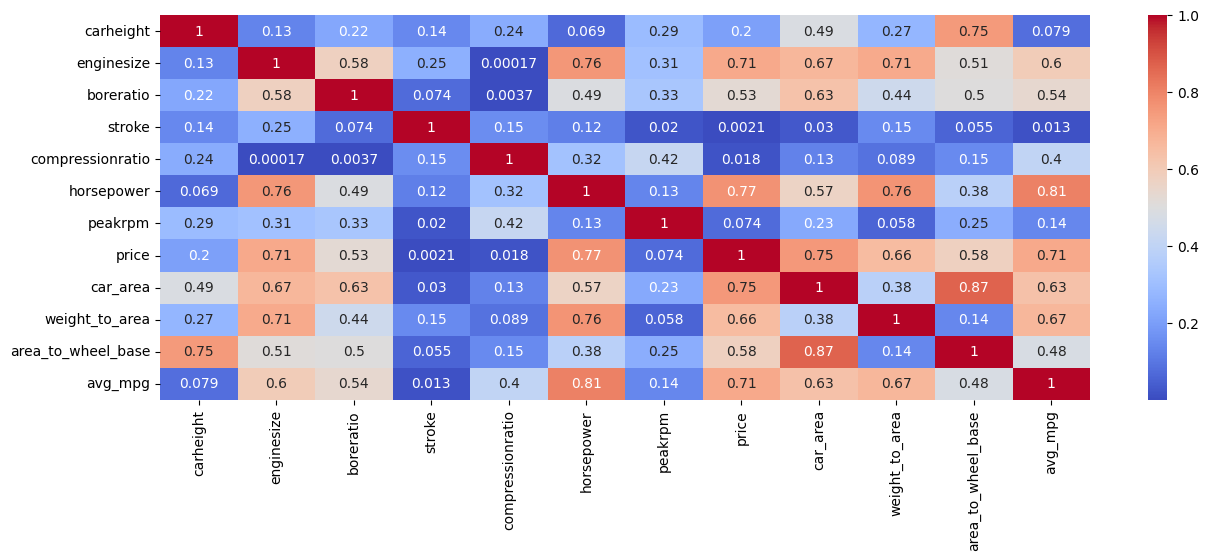

In [ ]:
# Again checking the Correlation between all the numerical data
plt.figure(figsize=(15,5))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True,cmap="coolwarm")

In [ ]:
milege_as_per_power=df1.groupby(['company_name','avg_mpg'])['horsepower'].max().reset_index()
milege_as_per_power.sort_values('horsepower', ascending=False).head()

,company_name,avg_mpg,horsepower
1,Nissan,20.0,200
35,mercury,21.5,175
84,volvo,19.5,162
63,toyota,21.5,161
64,toyota,22.0,161


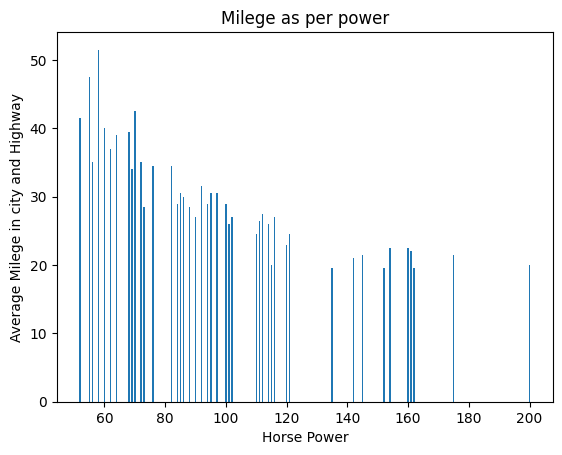

In [ ]:
# plot bar chart 
plt.bar(milege_as_per_power['horsepower'], milege_as_per_power['avg_mpg'], width=0.5)
plt.title('Milege as per power')
plt.xlabel('Horse Power')
plt.ylabel('Average Milege in city and Highway')
plt.show()

As we can see that as power increases milege is also decreases in city as well as highway.

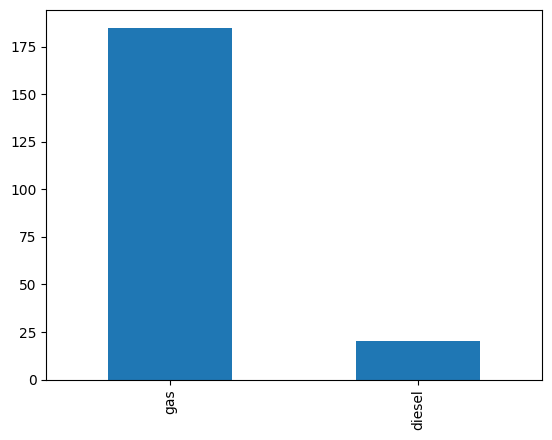

In [ ]:
fueltype_counts = df['fueltype'].value_counts().plot.bar() # check mostly prefer fuel type

Mostly Car is made with gas type fuel type

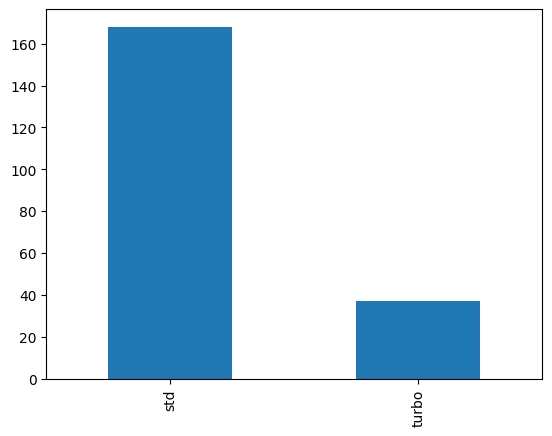

In [ ]:
aspiration_counts = df['aspiration'].value_counts().plot.bar() # check mostly prefer aspiration

Mostly company prefer standard aspiration

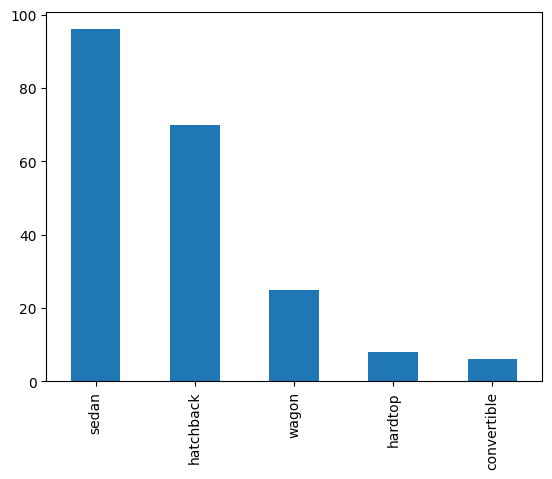

In [ ]:
bodytype_counts = df['carbody'].value_counts().plot.bar() # check mostly prefer car type

So Sedan is most preferable car followed by hatchback and wagon.

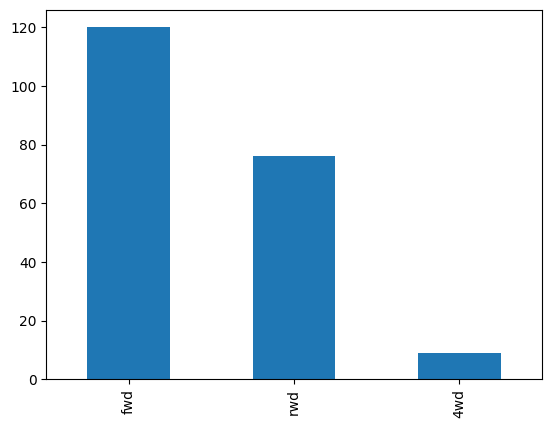

In [ ]:
Wheel_drive_counts = df['drivewheel'].value_counts().plot.bar() # check mostly prefer wheel drive

Mostly people prefer four wheel drive.

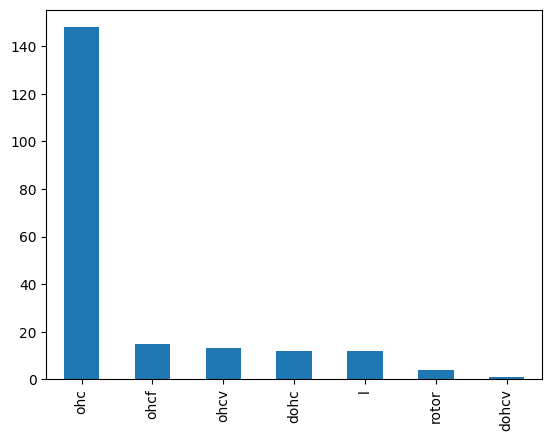

In [ ]:
Engine_type_counts = df['enginetype'].value_counts().plot.bar() # check mostly prefer engine type

mostly prefer ohc then ohcf and so on.

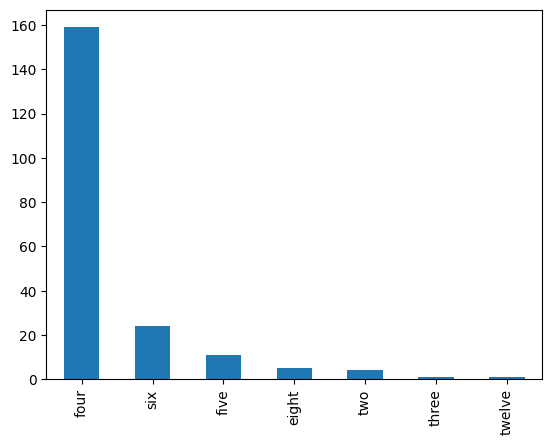

In [ ]:
number_cylinder_counts = df['cylindernumber'].value_counts().plot.bar() # check mostly prefer car cylinder

Four engine cylinder is mostly preferable

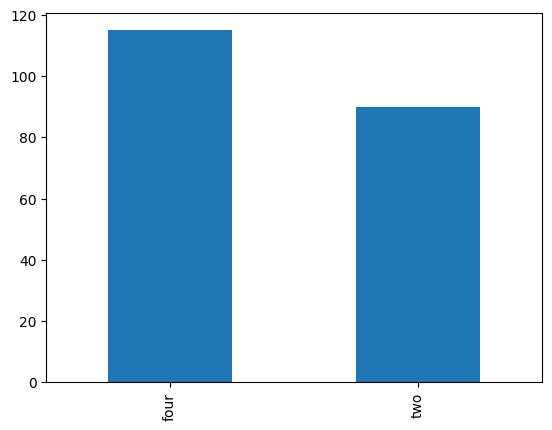

In [ ]:
car_doors_counts = df['doornumber'].value_counts().plot.bar() # check mostly prefer car doors

People generaly prefer 4 doors cars compare to two doors car

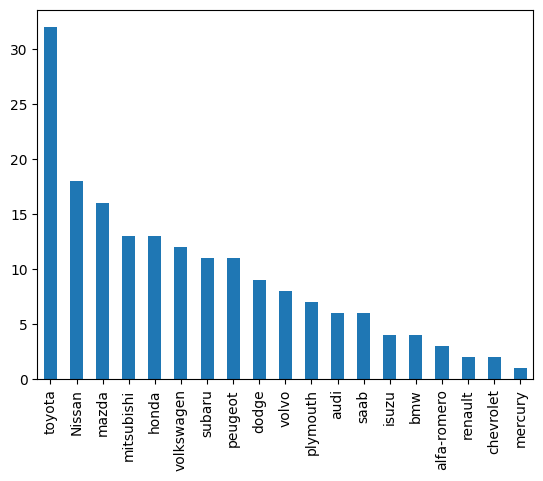

In [ ]:
company_name_counts = df1['company_name'].value_counts().plot.bar() # check mostly prefer car company name

toyota company is most preferable compare to others followed by Nissan and Mazda

In [ ]:
horsepower_as_per_size=df1.groupby(['company_name','horsepower','peakrpm'])['enginesize'].max().reset_index()
horsepower_as_per_size.sort_values('enginesize', ascending=False).head()

,company_name,horsepower,peakrpm,enginesize
3,Nissan,152,5200,181
4,Nissan,160,5200,181
5,Nissan,200,5200,181
64,toyota,156,5200,171
65,toyota,161,5200,171


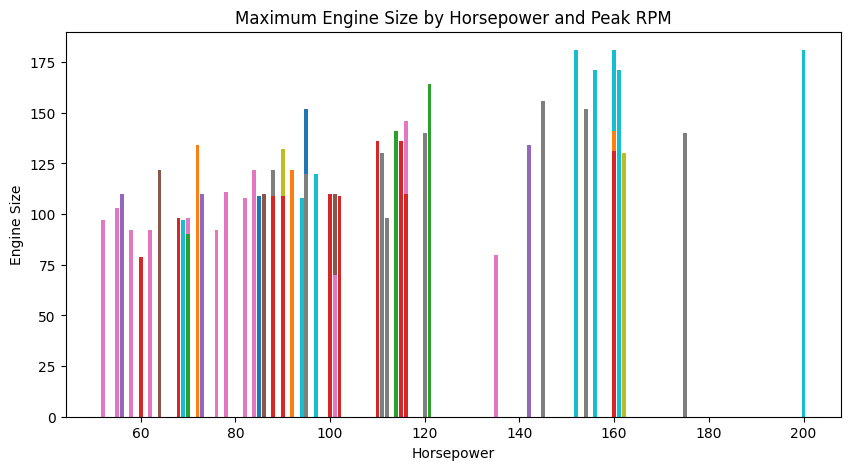

In [ ]:
# plot bar chart
fig, ax = plt.subplots(figsize=(10,5))
for name, group in horsepower_as_per_size.groupby('peakrpm'):
  ax.bar(group['horsepower'], group['enginesize'], label=name)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Engine Size')
ax.set_title('Maximum Engine Size by Horsepower and Peak RPM')
plt.show()

As we can see if we want to increase the peak rpm then we have to increase the horsepower and if horsepower increases automatically enginesize also increases.

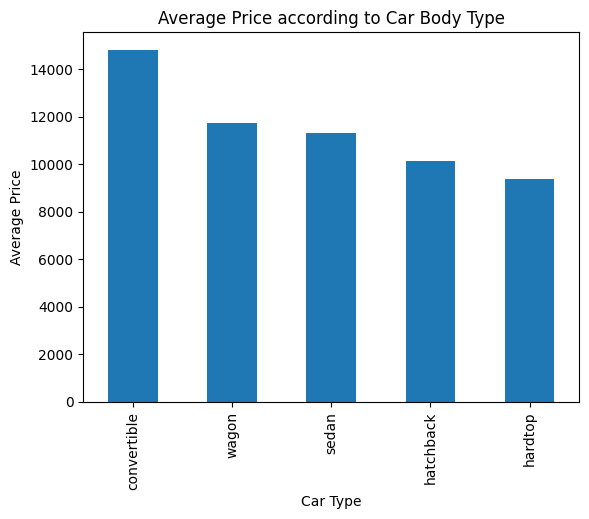

In [ ]:
Car_price_as_per_type=df1.groupby(['carbody'])['price'].mean().sort_values(ascending=False)
Car_price_as_per_type.plot.bar()
plt.title('Average Price according to Car Body Type')
plt.xlabel('Car Type')
plt.ylabel('Average Price')
plt.show()

So Convertible car has the maximum average price

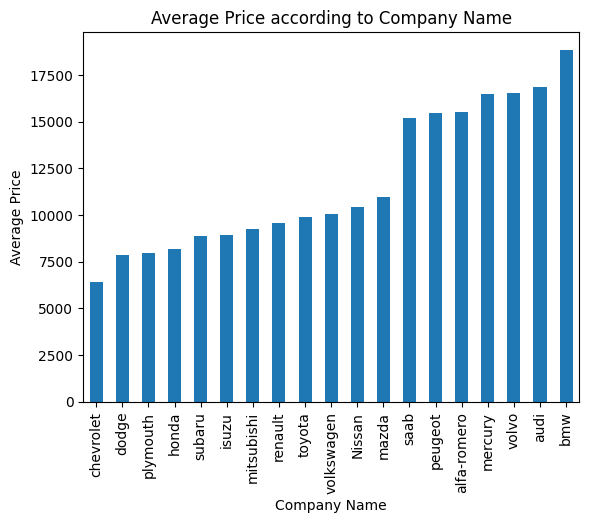

In [ ]:
Car_price_as_per_company_name=df1.groupby(['company_name'])['price'].mean().sort_values(ascending=True)
Car_price_as_per_company_name.plot.bar()
plt.title('Average Price according to Company Name')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.show()

BMW company manufature the most expensive cars.

# Data Preprocesing

In [ ]:
# Dummification of all the categorical values
def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data
# Applying the function to the cars_lr

df1 = dummies('fueltype',df1)
df1 = dummies('aspiration',df1)
df1 = dummies('carbody',df1)
df1 = dummies('drivewheel',df1)
df1 = dummies('enginetype',df1)
df1 = dummies('cylindernumber',df1)
df1 = dummies('doornumber',df1)
df1 = dummies('company_name',df1)
df1 = dummies('fuelsystem',df1)

In [ ]:
# Make list for independent variable
dependent_variable= 'price'
independent_variable=list(set(df1.columns.tolist()) - {dependent_variable})
independent_variable

['alfa-romero',
 'hardtop',
 'rotor',
 'isuzu',
 'mitsubishi',
 'ohcf',
 'bmw',
 'carheight',
 'avg_mpg',
 'peakrpm',
 'boreratio',
 'mazda',
 'sedan',
 'wagon',
 'honda',
 'renault',
 'mpfi',
 'peugeot',
 'subaru',
 'spdi',
 'l',
 'stroke',
 'area_to_wheel_base',
 'volvo',
 'horsepower',
 'spfi',
 'gas',
 'ohc',
 'idi',
 'turbo',
 'two',
 'dodge',
 'mercury',
 'rwd',
 'compressionratio',
 'fwd',
 'four',
 'saab',
 'toyota',
 'car_area',
 'audi',
 'chevrolet',
 '2bbl',
 'mfi',
 'volkswagen',
 'hatchback',
 'plymouth',
 'enginesize',
 'weight_to_area',
 'ohcv',
 '4bbl',
 'six']

In [ ]:
# Create the data of independent variables
X = df1[independent_variable].values

# Create the dependent variable data
y = df1[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=100) # Splitting data into train and test model with ratio(70:30)

In [ ]:
X_train[:5]   # checking the values

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.91000000e+01,
        2.95000000e+01, 4.80000000e+03, 3.05000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.03000000e+00, 6.66522019e+03, 0.00000000e+00,
        6.20000000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.07929200e+04, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.20000000e+01, 4.87566603e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00,

In [ ]:
# Scaling the data,Transforming data:-
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Fitting

In [ ]:
# create function to fit the data into t
def frame(model, X_train, X_test, y_train, y_test, param_grid, cv=3):

  # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(model, param_grid, cv=cv) # use grid search hyperparameters to find the best tunning and accuracy of the model
    grid_search.fit(X_train, y_train)  # fit the data into grid search
    best_params = grid_search.best_params_ # finidng the best hyperparameter for every classifiers

     # Train and evaluate the classifier with best hyperparameters
    model.set_params(**best_params) # here the parameter which comes out from the grid search set it to find out the accuracy
    model.fit(X_train, y_train) # fit the data into algorithms
    y_pred_train = model.predict(X_train) # implement algorithm on x_train and comes out y_prd_train
    y_pred_test = model.predict(X_test)   # implement algorith on X_test and comes out y_pred_test
    
    # Draw a line chart for showing the difference between actual and predicted value
    y_actual=y_test
    y_pred=model.predict(X_test)
    plt.plot(y_actual, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Observation')
    plt.ylabel('Target')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

  # Calculate evaluation metrics
    metrics = {}
    metrics['MSE_train'] = mean_squared_error(y_train, y_pred_train)
    metrics['MSE_test'] = mean_squared_error(y_test, y_pred_test)
    metrics['RMSE_train'] = np.sqrt(metrics['MSE_train'])
    metrics['RMSE_test'] = np.sqrt(metrics['MSE_test'])
    metrics['MAE_train'] = mean_absolute_error(y_train, y_pred_train)
    metrics['MAE_test'] = mean_absolute_error(y_test, y_pred_test)
    metrics['R2_train'] = r2_score(y_train, y_pred_train)
    metrics['R2_test'] = r2_score(y_test, y_pred_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - ((1 - metrics['R2_test']) * (n - 1)) / (n - p - 1)
    metrics['Adj_R2_test'] = adj_r2

    # Perform Cross-Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)  # Perform CV on training data. cv is basically the number of folds taken by algoritm for calculation the accuracy.
    metrics['CV_Accuracy_Scores'] = cv_scores

   # Print evaluation metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
        
    
    return model


## Linear Regression

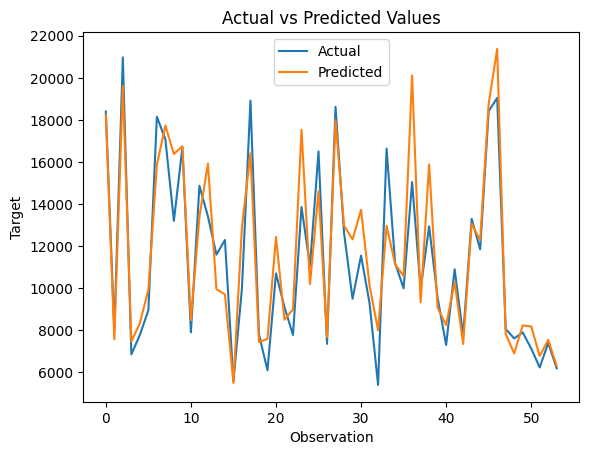

MSE_train: 941896.9249172979
MSE_test: 2894563.993862981
RMSE_train: 970.5137427761123
RMSE_test: 1701.3418215817128
MAE_train: 768.7339914563261
MAE_test: 1258.8084777764336
R2_train: 0.941658199113472
R2_test: 0.8350698007936108
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.54964367 0.69662079 0.51899584]


LinearRegression()

In [ ]:
# Fitting Linear Regression Model

regression = LinearRegression()
param_grid = {} # as there are no hyperparameters in Linear Regression so empty set
frame(regression, X_train, X_test, y_train, y_test, param_grid, cv=3)


## Using VIF technique to check the multicollinearity between all the dependent variables and drop for accuracy of the model

In [ ]:
# Select the features for which you want to calculate VIF
X = df1[['area_to_wheel_base', 'horsepower', 'enginesize','avg_mpg','carheight','car_area','weight_to_area']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values(by = "VIF_factor", ascending = False)

# Print the VIF values
print(vif)

    VIF_factor            features
0  1863.915473  area_to_wheel_base
4  1187.806281           carheight
5   936.669410            car_area
6   185.616520      weight_to_area
2    71.950764          enginesize
3    54.804096             avg_mpg
1    52.334036          horsepower


So we can check here according to VIF score area_to_wheel_base feature have maximum score we drop it for better accuracy.

In [ ]:
df1.drop('area_to_wheel_base', axis=1, inplace=True)

In [ ]:
# Select the features for which you want to calculate VIF
X = df1.drop(columns=['price'])  # exclude the target variable

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values(by = "VIF_factor", ascending = False)
# Print the VIF values
print(vif)


      VIF_factor          features
20           inf              ohcf
18           inf                 l
37           inf           peugeot
25           inf               two
22           inf             rotor
41           inf            subaru
10  1.371217e+04               gas
47  1.739261e+03               idi
4   2.262328e+02  compressionratio
5   4.156984e+01        horsepower
1   3.799128e+01        enginesize
49  3.664744e+01              mpfi
45  3.001036e+01              2bbl
14  2.789804e+01             sedan
13  2.392001e+01         hatchback
24  2.025249e+01               six
19  1.927330e+01               ohc
17  1.688662e+01               rwd
23  1.638561e+01              four
15  1.498677e+01             wagon
2   1.382636e+01         boreratio
8   1.327516e+01    weight_to_area
7   1.177552e+01          car_area
16  1.175425e+01               fwd
9   1.053177e+01           avg_mpg
50  9.708177e+00              spdi
32  9.478677e+00             honda
6   7.608788e+00    

In [ ]:
# These all features have perfect multicollinearity so remove them
df1.drop('ohcf',axis=1,inplace=True) 
df1.drop('l',axis=1,inplace=True)
df1.drop('peugeot',axis=1,inplace=True)
df1.drop('two',axis=1,inplace=True)
df1.drop('rotor',axis=1,inplace=True)
df1.drop('subaru',axis=1,inplace=True)

## Lasso Regression

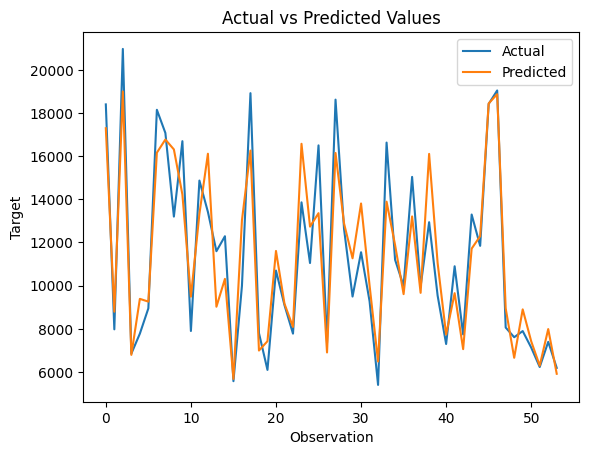

MSE_train: 1378702.6642532183
MSE_test: 2576522.5114001394
RMSE_train: 1174.18169984599
RMSE_test: 1605.1549804925814
MAE_train: 883.7865591205885
MAE_test: 1281.1772329249027
R2_train: 0.9146021245088475
R2_test: 0.8531915784325593
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.75910549 0.81600554 0.78511643]


Lasso(alpha=10, fit_intercept=False)

In [ ]:
lasso_cv = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept': [True, False]} # hyperparameters for lasso algorithm
frame(lasso_cv, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3) # we use scaled data for Lasso

## Elastic Net Regression

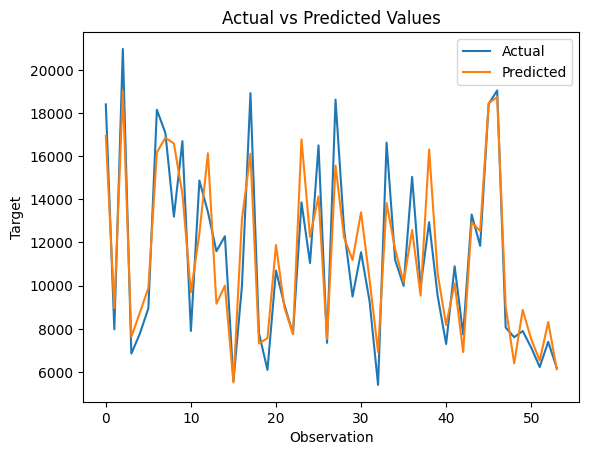

MSE_train: 1547463.384911342
MSE_test: 2753321.3667636146
RMSE_train: 1243.9708135287347
RMSE_test: 1659.3135227447567
MAE_train: 944.8314067526873
MAE_test: 1328.502425749127
R2_train: 0.9041489590916574
R2_test: 0.8431177053047297
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.7828845  0.79377258 0.77912521]


ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=100)

In [ ]:
elastic_net = ElasticNet()
# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'fit_intercept': [True, False], 'max_iter': [100, 500, 1000]}

frame(elastic_net, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3)


## Decision Tree Regression

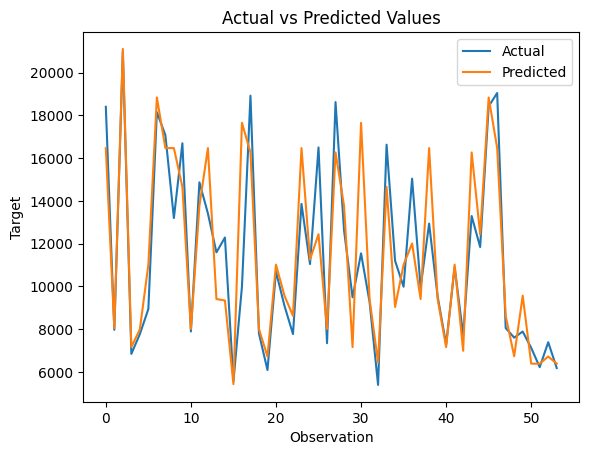

MSE_train: 478898.5220477903
MSE_test: 4491290.155050985
RMSE_train: 692.0249432266082
RMSE_test: 2119.2664190825526
MAE_train: 438.46137634408603
MAE_test: 1466.082925925926
R2_train: 0.9703366669122336
R2_test: 0.7440894789209078
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.63016817 0.55644259 0.64312144]


DecisionTreeRegressor(max_depth=9, min_samples_split=6, random_state=1)

In [ ]:
DTR_regression = DecisionTreeRegressor(random_state=1) # implement the classification algorith with randomness value 1

'''these all are hyperparameter for tuning like maxdepth tell how much upto it grow. 
leaf nodes are the end nodes from which no other brach comes out, 
criteria entropy and gini both for impurity.'''

param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 4, 6, 8]} 
frame(DTR_regression, X_train, X_test, y_train, y_test, param_grid, cv=3) # implement function evaluate

## Random Forest Regression

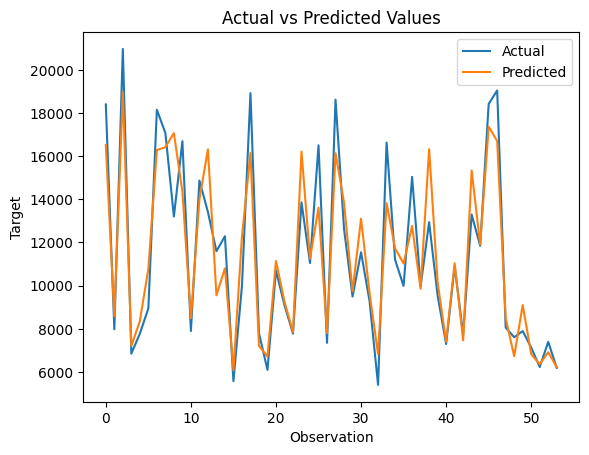

MSE_train: 416818.46000177495
MSE_test: 2450237.1601864565
RMSE_train: 645.6147922730511
RMSE_test: 1565.3233404592345
MAE_train: 480.3239497075535
MAE_test: 1198.2791887810142
R2_train: 0.9741819524451808
R2_test: 0.860387227993834
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.78623606 0.75219166 0.67896595]


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500)

In [ ]:
RFR_regressor = RandomForestRegressor()
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [None, 5, 10], 'max_features': ['auto', 'sqrt', 'log2']}
frame(RFR_regressor, X_train, X_test, y_train, y_test, param_grid, cv=3)

## XG Boost

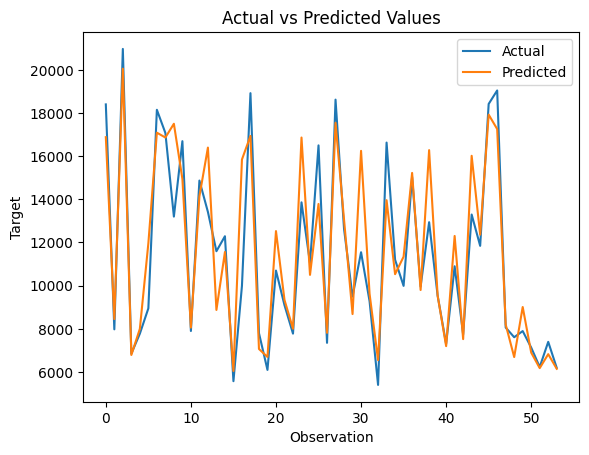

MSE_train: 244788.4365010001
MSE_test: 3224557.0174959856
RMSE_train: 494.7609892675453
RMSE_test: 1795.7051588431732
MAE_train: 386.06083426789314
MAE_test: 1235.792552806713
R2_train: 0.9848376209287234
R2_test: 0.8162670328327355
Adj_R2_test: -inf
CV_Accuracy_Scores: [0.78392951 0.78466684 0.59501869]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_reg = xgb.XGBRegressor()
param_grid = {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7], 'n_estimators': [100, 500, 1000]}
frame(xgb_reg, X_train, X_test, y_train, y_test, param_grid, cv=3)


# Visualize the accuracy of all regression models

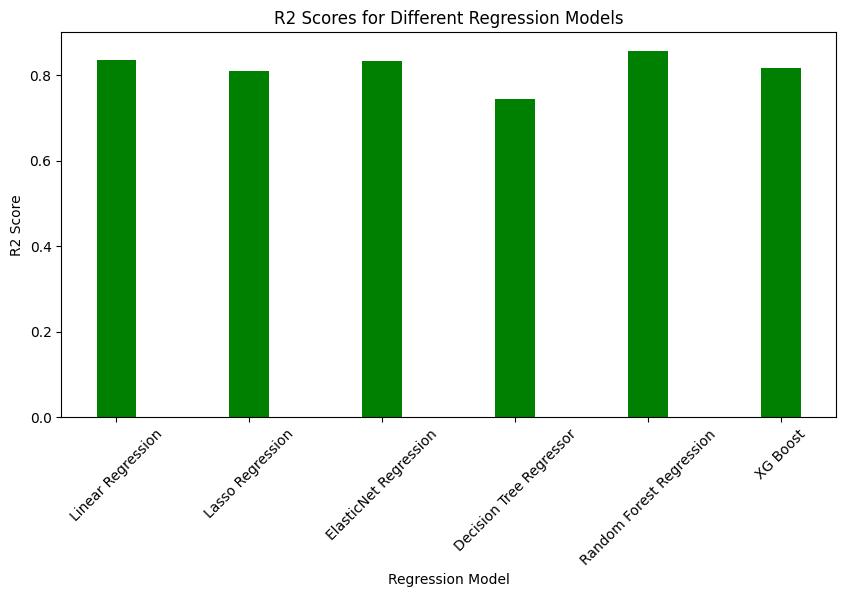

In [ ]:
# Train and evaluate models
models = [regression, lasso_cv, elastic_net, DTR_regression, RFR_regressor, xgb_reg]
model_names = ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression', 'Decision Tree Regressor', 'Random Forest Regression', 'XG Boost']
r2_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Plot R2 scores for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, width=0.3, color='green')
plt.xticks(rotation=45)
plt.title('R2 Scores for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('R2 Score')
plt.show()

# Business Objective

---

The business objective of the Car Price Prediction project is to develop a machine learning model that can accurately predict the selling price of cars based on various features such as car model, mileage, engine power, and other factors. This will help car dealerships and individuals to estimate the value of their cars and make informed decisions about pricing and sales. Additionally, the model can be used by car manufacturers to understand the market demand for specific car models and adjust their production and pricing strategies accordingly.

# Conclusion

---
## EDA Insights:



*   The dataset consists of 205 records and 26 attributes.
*   The target variable (price) has a mean value of 13276.71 and a standard deviation of 7988.85, with a minimum price of 5118 and a maximum price of 45400.

*   The majority of the cars in the dataset have a fuel type of gas and an aspiration type of std.
*   The car body type of sedan is the most common, followed by hatchback and wagon.

*   Convertible cars are most expensive compare to other segments cars.
*   High hourse power in car cause low milege and vice versa.

*   Most expensive cars are generaaly made by BMW.





*   Most of the cars in the dataset have a front-wheel drivetrain, with rear-wheel and four-wheel drivetrains being less common
*   The majority of the cars have an engine type of ohc, followed by ohcf and ohcv.

*   The number of cylinders in most of the cars is four, followed by six and five.
*   Most of the cars in the dataset have two doors, followed by four doors.

*   Toyota is the most common car company in the dataset, followed by Nissan and Mazda.
*   There is a positive correlation between price and engine size, horsepower, curb weight, and car width.

*   There is a negative correlation between price and city miles per gallon (mpg) and highway mpg.

---




## Results of ML model:

---
*   Data cleaning: The dataset had missing values, outliers, and incorrect data types, which were handled by imputing missing values, treating outliers, and converting data types.

*   Feature Engineering: New features were created from existing ones, such as car area and weight_to_area, to improve model performance.
*   Feature Selection: Correlation matrix and heatmap were used to select the most relevant features for the prediction model.

*   Data Normalization: The data was standardized using the MinMaxScaler function to normalize the data and make it easier for the model to learn.
*   Model Selection: Five different regression models, including Linear Regression, Lasso, ElasticNet, Decision Tree, Random Forest, and XGBoost, were trained and compared using cross-validation.

*   Model Evaluation: The performance of the models was evaluated using the R-squared value, adjusted R-squared value, mean squared error, root mean squared error, mean absolute error and cross-validation accuracy score. The Lasso model outperformed the other models with an R-squared value of 0.853.
*   Hyperparameter Tuning: The hyperparameters of all model were fine-tuned using the GridSearchCV function to improve its performance further.




















